<div style=" border-bottom: 8px solid #00B2FF; overflow: hidden; border-radius: 10px; height: 60px; width: 100%; display: flex;">
  <div style="height: 100%; width: 100%; background-color: #3800BB; float: left; text-align: center; display: flex; justify-content: left; align-items: center; font-size: 40px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">Visualization: Model Errors</span></b>
  </div>
</div>

<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px;">
    <strong> Contents </strong>
  </h5>
<hr>
  <p><font size="3" face="Arial" font-size="large"><ul type="square">  
  <li> Feature Importance </li>
  <li> SHAP values </li>
  <li> classification report </li>
  <li> Confusion Matrix </li>
  <li> Regression and Error (Actual and Predicted difference) </li>
  <li> (True - Pred) vs (True + Pred) visual </li>
  <li> Conclusion </li>
  </li></ul></font></p>

</div>

<img src='../imgs/03.4.02_1.JPG' width="1000" height="300" />

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

Visualization can help even after we have **already trained** a model.  
For example: 
* Understand what adds noise to the model or what can be added to make model more precise.
* Draw conclusions about how accuracy can be improved in further experiments.
* Visualize model errors
* Eliminate unnecessary features
* Find ideas for new features.

It all depends on the type of the data

</div>

<div class="alert alert-warning">

### **Import Packages and Overview Dataset**
</div>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from classes import Paths


import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now you can import the utils module
import utils as u

In [3]:
paths = Paths()
path = paths.quickstart_train
df = pd.read_csv(path)
display(df.shape)
display(df.dtypes)
df.head(10)



(2337, 17)

car_id                       object
model                        object
car_type                     object
fuel_type                    object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
target_reg                  float64
target_class                 object
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
dtype: object

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.74,"12,141,310.41",0.10,180.86,0.02,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.48,"18,039,092.84",0.00,187.86,12.31,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.77,"15,883,659.43",0.10,102.38,2.51,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,engine_fuel,3.88,"16,518,828.77",0.10,172.79,-5.03,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,engine_fuel,4.18,"13,983,174.66",0.10,203.46,-14.26,174,171
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,48.99,engine_ignition,4.35,"10,855,890.99",0.10,180.89,-18.22,174,173
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.72,engine_overheat,4.39,"8,343,280.33",0.10,174.98,12.32,174,167
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.40,gear_stick,4.71,"9,793,288.03",0.10,95.89,-8.94,174,139
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.59,gear_stick,4.51,"16,444,046.89",0.32,101.80,-1.16,174,170
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.04,gear_stick,4.38,"6,975,742.48",0.10,125.25,3.77,174,173


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq,random_feature_1,random_feature_2,random_feature_3
1273,p25512710L,Fiat 500,business,petrol,2.38,2014,65690,2017,33.71,gear_stick,4.41,"6,151,188.24",0.10,110.15,11.09,174,174,0.65,-0.19,30
73,P-1870462h,Hyundai Solaris,economy,petrol,5.78,2015,85556,2020,48.04,break_bug,5.32,"4,148,047.55",0.10,136.88,-4.00,174,172,0.74,1.89,43
687,t-1412384s,Hyundai Solaris,economy,petrol,5.40,2015,88544,2018,30.74,engine_fuel,4.28,"15,098,323.62",0.10,151.25,3.14,174,171,0.10,-0.18,10
203,w19872753k,Kia Rio X-line,economy,petrol,3.60,2011,7238,2017,46.25,engine_check,4.50,"18,276,998.20",0.10,165.00,15.86,174,167,0.06,-0.99,91
2084,K-2177169P,Smart Coupe,economy,petrol,4.82,2014,66742,2020,50.69,engine_ignition,4.11,"20,470,240.36",0.10,194.69,-18.34,174,172,0.26,-0.51,33


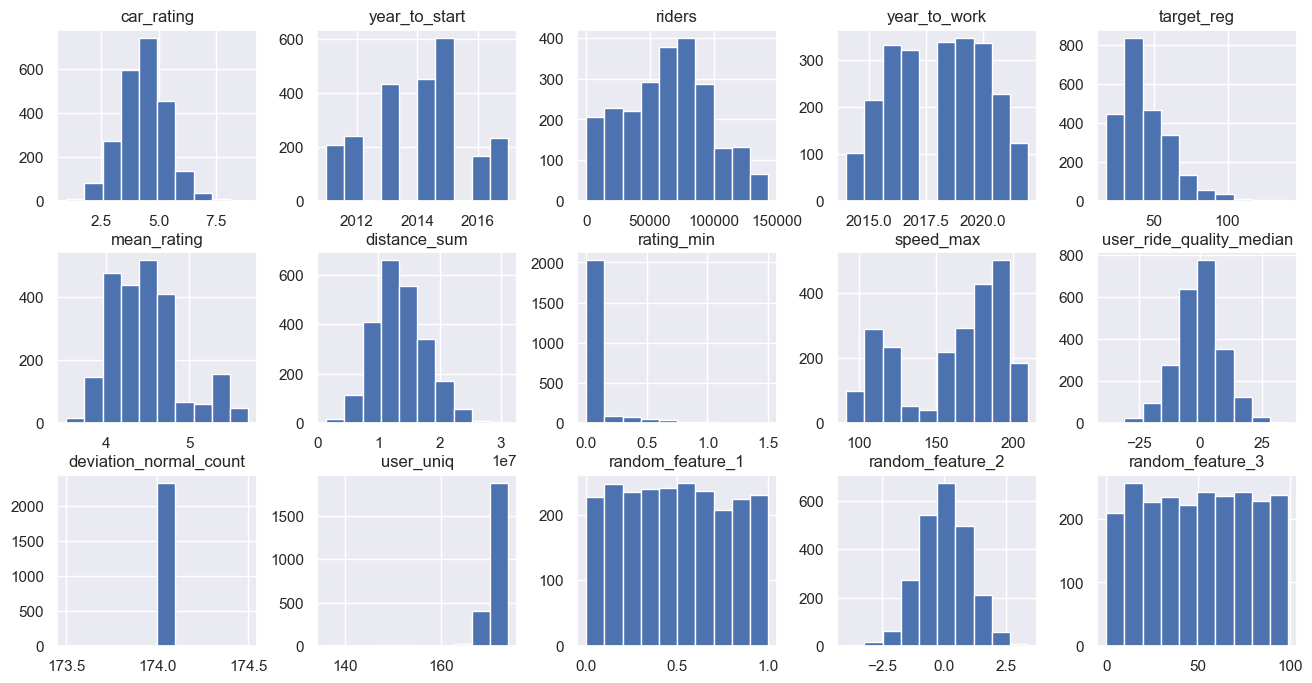

In [4]:
df['random_feature_1'] = np.random.random(size=df.shape[0])
df['random_feature_2'] = np.random.normal(size=df.shape[0])
df['random_feature_3'] = np.random.randint(100, size=df.shape[0])

df.hist(figsize=(16, 8)
        , layout=(-1, 5))
df.sample(5)

In [5]:
from sklearn.model_selection import train_test_split

drop_cols = ['user_id', 'car_id', 'ride_id', 'ride_date']
cat_cols = ['car_type', 'fuel_type', 'model']

y = df['target_class']
X = df.drop(columns=drop_cols + ['target_class', 'target_reg']
            , axis=1
            , errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.2
                                                    , random_state=42)

<div class="alert alert-warning">

### **Classification**
</div>

In [6]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

clf = CatBoostClassifier(
    random_seed=9
  , thread_count=-1
  , use_best_model=True
  , cat_features=cat_cols
  , colsample_bylevel=0.1
  , subsample=0.95
  , bootstrap_type='Bernoulli'
)

clf.fit(
    X_train
    , y_train
    , eval_set=(X_test, y_test)
    , verbose=250
    , plot=False
    , early_stopping_rounds=100
)

print(clf.get_best_score())

Learning rate set to 0.109335
0:	learn: 2.0415376	test: 2.0431216	best: 2.0431216 (0)	total: 64.1ms	remaining: 1m 4s
250:	learn: 0.3408519	test: 0.5510091	best: 0.5510091 (250)	total: 500ms	remaining: 1.49s
500:	learn: 0.2145518	test: 0.5330503	best: 0.5322129 (463)	total: 950ms	remaining: 946ms
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5302951131
bestIteration = 583

Shrink model to first 584 iterations.
{'learn': {'MultiClass': 0.15931046499783175}, 'validation': {'MultiClass': 0.5302951131459939}}


<div class="alert alert-warning">

### **Visualize feature importance `CatBoost`**
</div>

In [7]:
# let's see the feature importances
fi = clf.get_feature_importance(prettified=True)
fi[:20].style.background_gradient(cmap='viridis', subset=pd.IndexSlice[0:10, 'Importances'])

,Feature Id,Importances
0,speed_max,32.789360
1,mean_rating,27.994802
2,rating_min,11.961223
3,user_uniq,4.566742
4,car_type,3.146202
5,model,2.290615
6,car_rating,2.218350
7,user_ride_quality_median,2.161321
8,random_feature_2,2.107850
9,random_feature_3,1.997441


<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

We should not trust this importance rating too much, because for highly correlated features, the importance is divided in half and they can both fly down in importance rating.

</div>

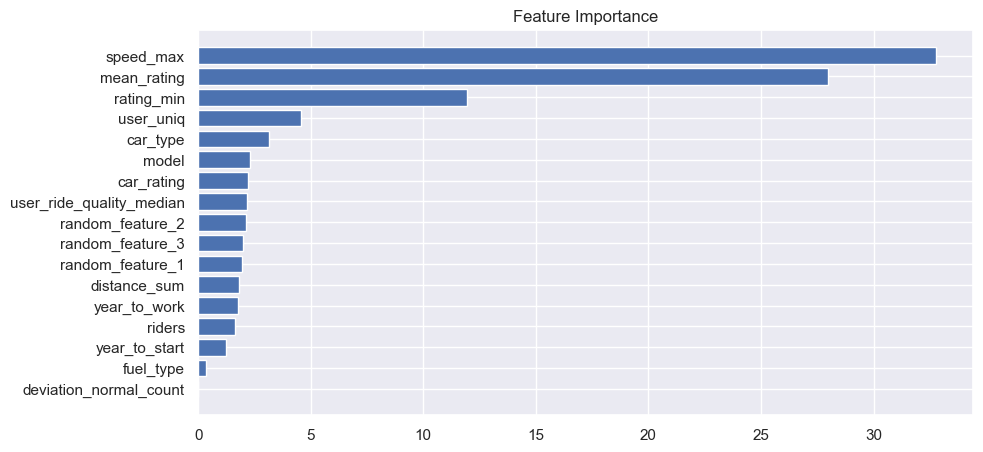

In [8]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

<div class="alert alert-warning">

### **Feature Importance plot using `Seaborn` cross validation**
</div>

In [9]:
from sklearn.model_selection import KFold

n_splits = 5
targets = ['target_class']
clfs = []
scores = []
kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)

    clf = CatBoostClassifier(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                        colsample_bylevel =  0.1,
                        subsample = 0.95,
                        bootstrap_type='Bernoulli',)

    clfs.append(clf)

    clf.fit(train_dataset, eval_set=eval_dataset,
            verbose = False, use_best_model = True, plot = False)

    scores.append(np.mean([v for k, v in clf.best_score_['validation'].items()], dtype = 'float16'))
    
print('mean recall score --------->', np.mean(scores, dtype = 'float16'), np.std(scores, dtype = 'float16'))

mean recall score ---------> 0.5044 0.03183


<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

<h3>

**A function for displaying the spread of feature importance by folds**

</h3>

</div>

17 features in total, averaged by 5models: 
14 features are shown on graph


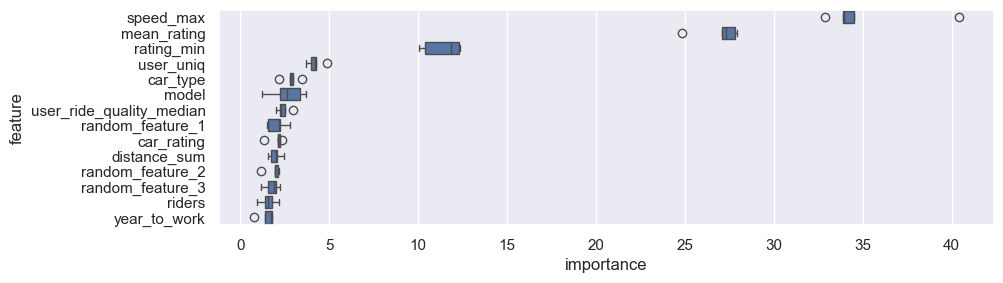

In [10]:
# plot importance of all folds at once and see top-14 features
df_feats_imp = u.plot_importance(X, clfs, height = 0.20, top_n = 14)

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  
  **Let's look at the feature importance plots of more accurate methods.**

</div>

<div class="alert alert-warning">

### **Permutation Importance**
</div>

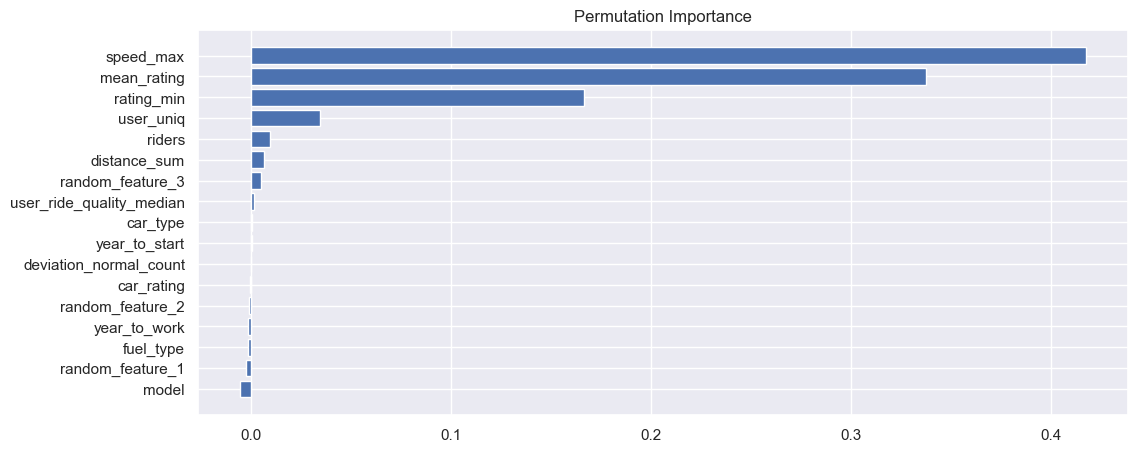

In [11]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance');

<img src='../imgs/03.4.02_2.png'/>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**In the SHAP library, Shapley values are calculated to assess the importance of features (the package is named after the American mathematician), it has rich visualization functionality that helps to explain the model easily and simply.**

**To assess the importance of the feature, the predictions of the model with and without this feature are evaluated.**

</div>

In [12]:
# The shap library can be capricious to install and may conflict with other packages
# Sometimes this set of commands helps
#!pip uninstall opencv-python -y -q
#!pip install opencv-python shap -q

In [13]:
import shap
shap.initjs()

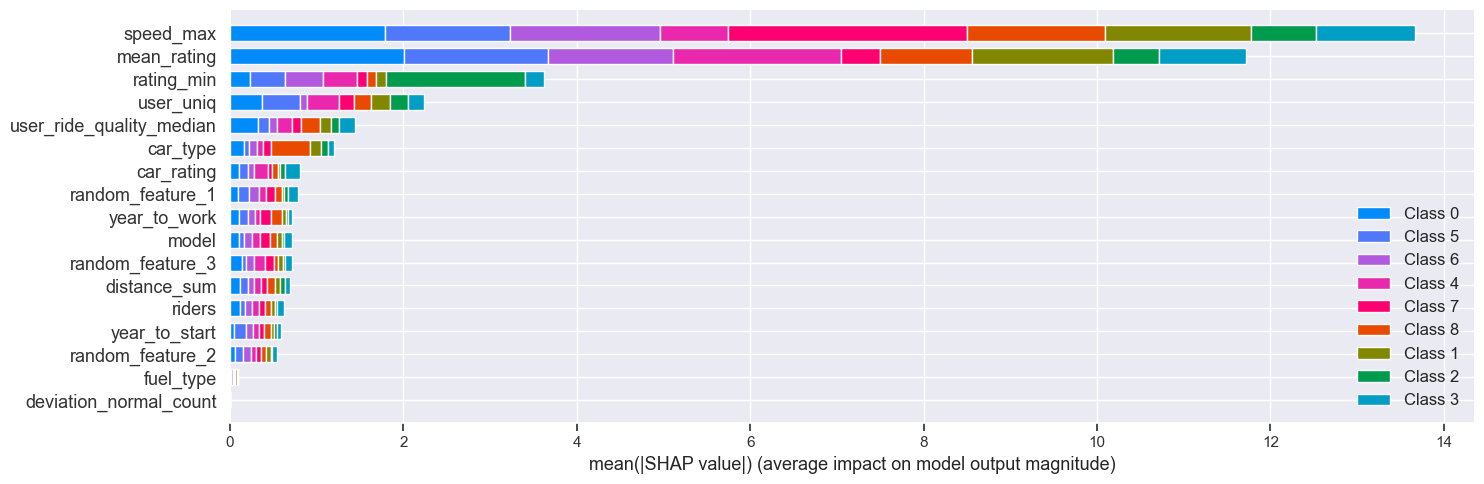

In [14]:
# we can see the impact of features on all classes
explainer = shap.TreeExplainer(clf)

val_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_test, max_display = 25, plot_size = (15, 5))

Class 0
another_bug


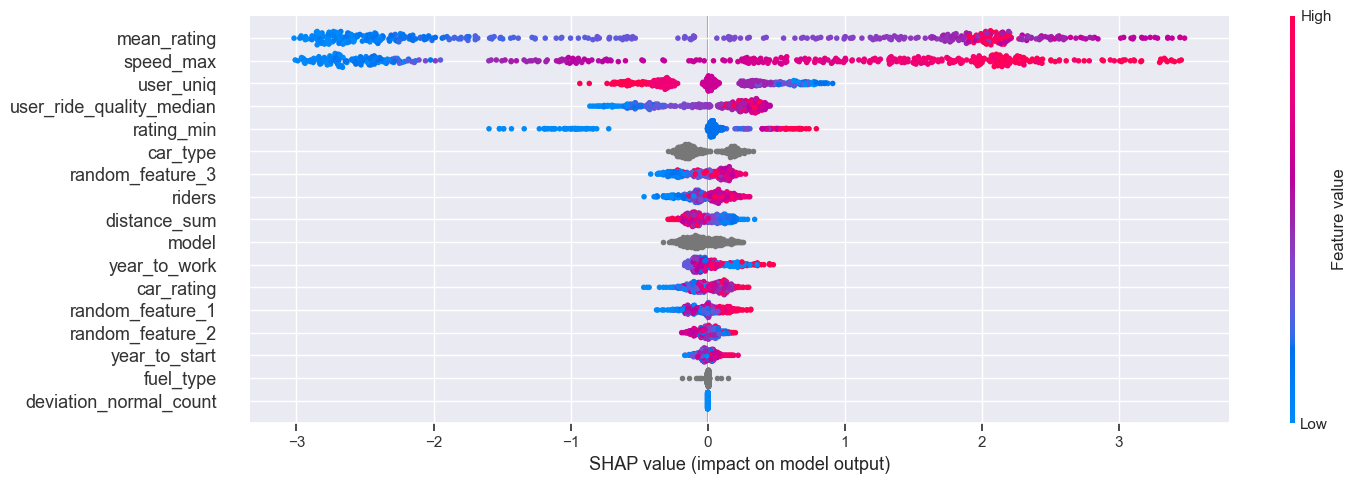

Class 1
break_bug


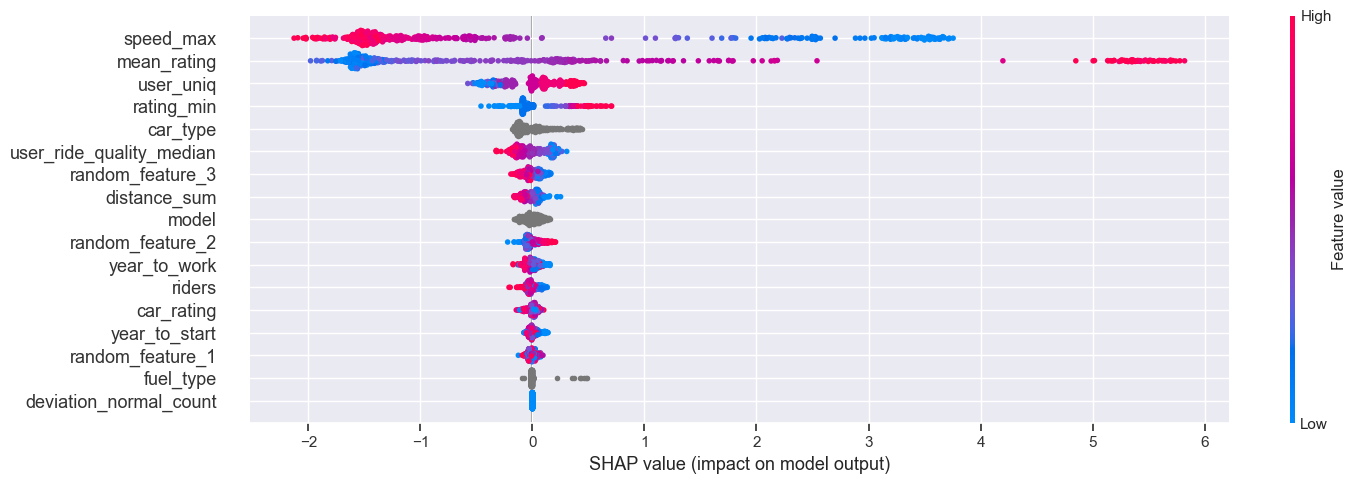

Class 2
electro_bug


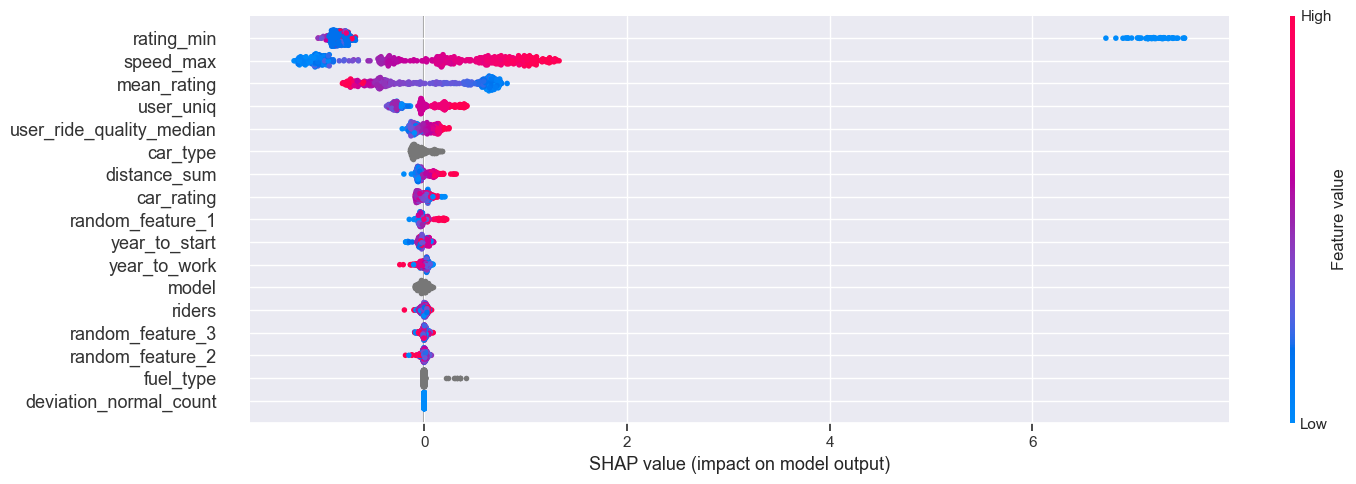

In [15]:
# or for each class separately
for i in range(len(np.unique(y.values))):
    print(f'Class {i}')
    print(np.unique(y.values)[i])
    shap.summary_plot(shap_values[i], X_test, color_bar=True, plot_size = (15, 5))
    if i == 2:
        break
# shap.summary_plot(shap_values[1], X_test, color_bar=False)

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

### **How to "read" the plot?**

* the values to the left of the central vertical line are **negative** class (0), to the right are **positive** (1)
* the thicker the line on the graph, the more such observation points there are
* the redder the dots on the graph, the higher the values of the feature in it.

</div>

<div class="alert alert-warning">

### **shap.force_plot()**
</div>

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  
  **We can see the impact of each feature on the model's decision to classify the car as class 0 or class 4**

</div>

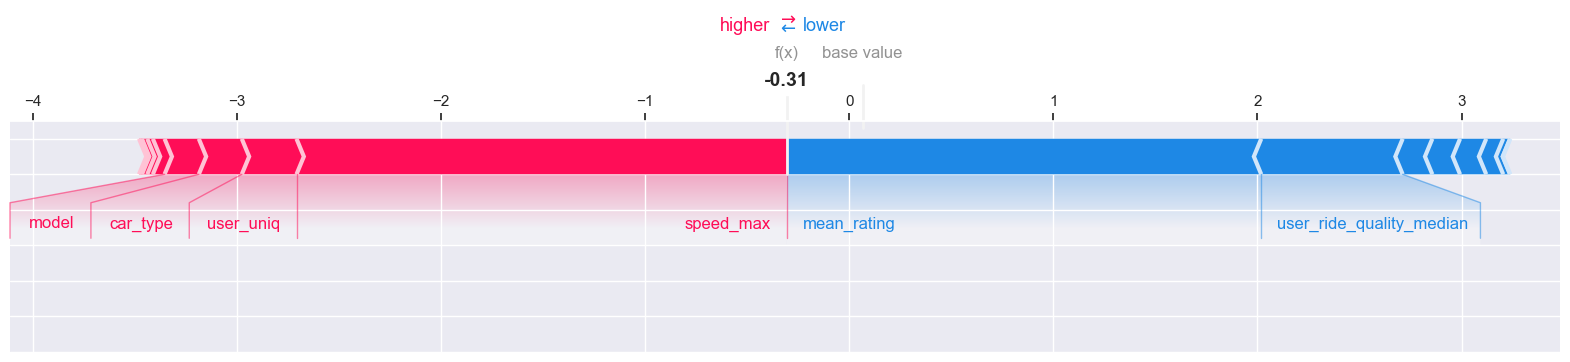

In [16]:
import matplotlib

shap.force_plot(
    explainer.expected_value[0]
    , shap_values[0][0]
    , feature_names=X_test.columns
    , matplotlib=matplotlib
)

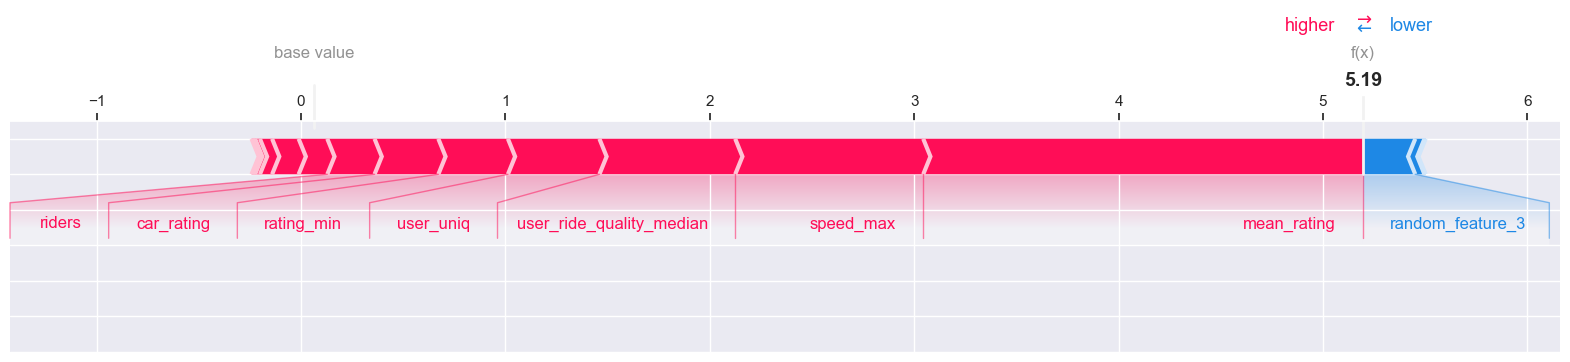

In [17]:
shap.force_plot(
    explainer.expected_value[0]
    , shap_values[4][0]
    , feature_names=X_test.columns
    , matplotlib=matplotlib
)

<div class="alert alert-warning">

### **shap.waterfall_plot()**
</div>

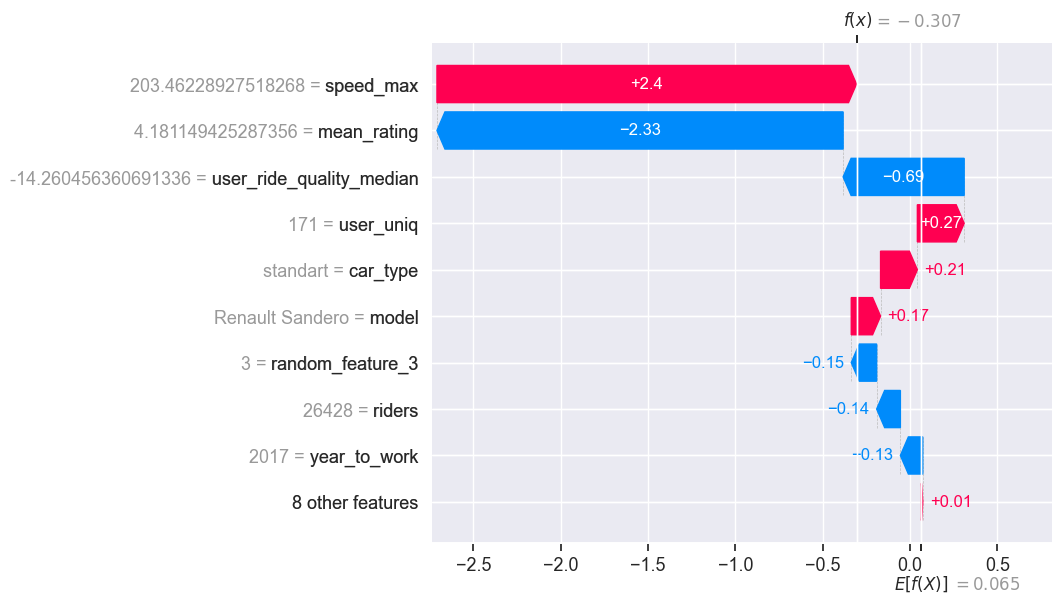

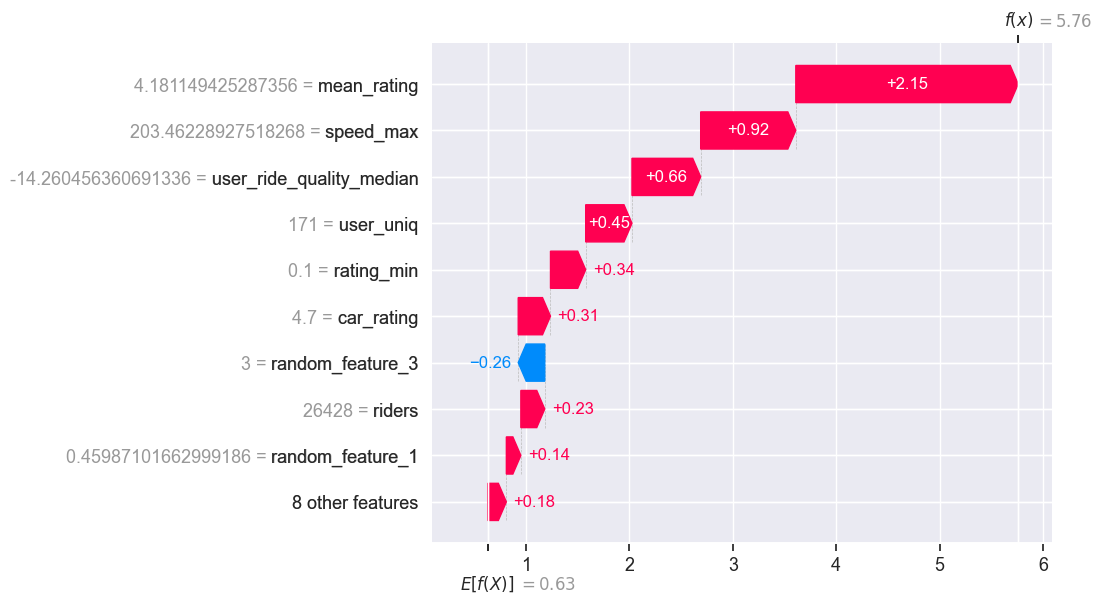

In [18]:
# waterfall_plot shows the numerical impact of each feature
s_values = explainer(X_test)
shap.waterfall_plot(s_values[0][:, 0])
shap.waterfall_plot(s_values[0][:, 4])

<div class="alert alert-warning">

### **`classification_report` - one function that displays all main metrics**
</div>

In [19]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=clf.classes_))

                 precision    recall  f1-score   support

    another_bug       0.94      0.83      0.88        59
      break_bug       1.00      1.00      1.00        56
    electro_bug       1.00      1.00      1.00        56
   engine_check       0.69      0.89      0.78        45
    engine_fuel       0.73      0.74      0.73        50
engine_ignition       0.53      0.44      0.48        61
engine_overheat       0.56      0.65      0.60        62
     gear_stick       0.96      0.92      0.94        48
    wheel_shake       0.84      0.70      0.76        30

       accuracy                           0.79       467
      macro avg       0.80      0.80      0.80       467
   weighted avg       0.80      0.79      0.79       467



In [20]:
rep = pd.DataFrame(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=clf.classes_,
                            output_dict=True)).T

rep['support'] = rep.support.apply(int)
rep.style.background_gradient(cmap='RdYlGn', subset=pd.IndexSlice['another_bug':'wheel_shake', :'f1-score'])

,precision,recall,f1-score,support
another_bug,0.942308,0.830508,0.882883,59
break_bug,1.000000,1.000000,1.000000,56
electro_bug,1.000000,1.000000,1.000000,56
engine_check,0.689655,0.888889,0.776699,45
engine_fuel,0.725490,0.740000,0.732673,50
engine_ignition,0.529412,0.442623,0.482143,61
engine_overheat,0.555556,0.645161,0.597015,62
gear_stick,0.956522,0.916667,0.936170,48
wheel_shake,0.840000,0.700000,0.763636,30
accuracy,0.792291,0.792291,0.792291,0


<div class="alert alert-warning">

### **confusion_matrix**
</div>

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  
  **Let's see where the model makes the most mistakes (in which classes) using the confusion matrix.**

</div>

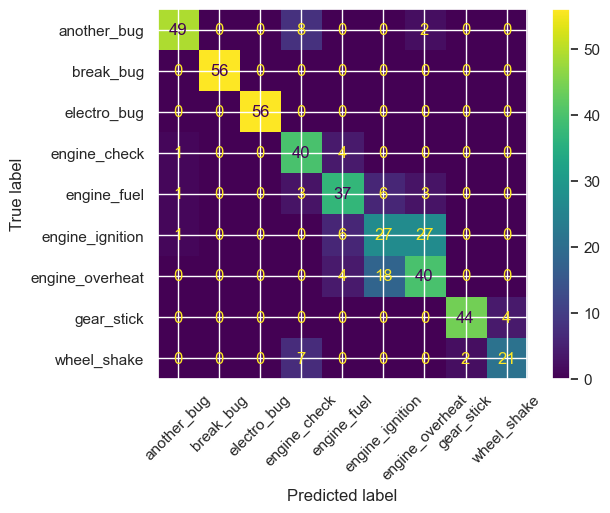

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_, xticks_rotation=45)

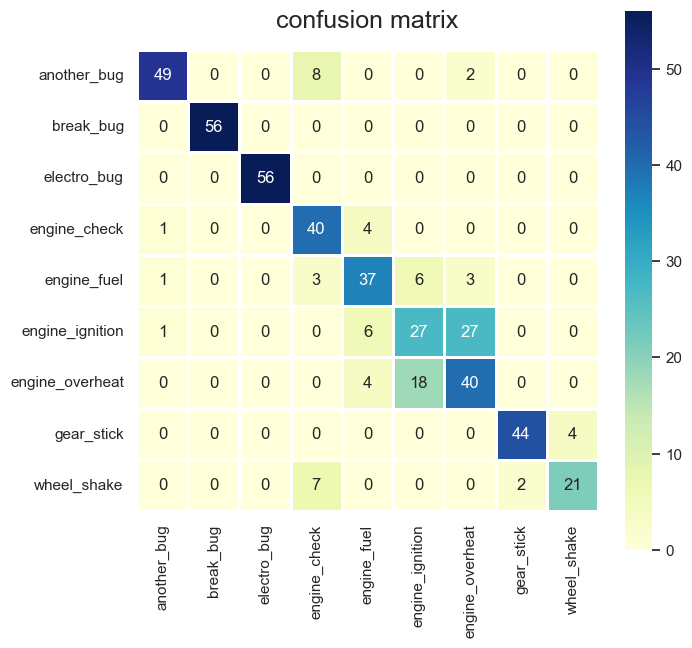

In [22]:
plt.rcParams['figure.figsize']=(7, 7)
cf = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(
    cf
    , index=[i for i in clf.classes_]
    , columns=[i for i in clf.classes_]
)
heatmap = sns.heatmap(
    df_cm,
    square=True,
    cmap="YlGnBu", # BrBG
    cbar_kws={"fraction": 0.1},
    linewidth=1,
    annot=True,
)

heatmap.set_title(
    "confusion matrix", fontdict={"fontsize": 18}, pad=16
);

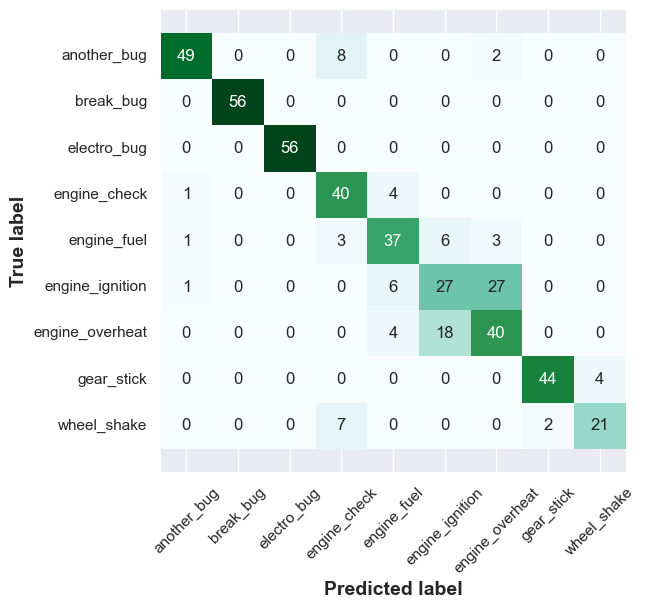

In [23]:
u.plot_confusion(Y_test = y_test, Y_test_pred = y_pred, labels = clf.classes_ )

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

### **How to "read" this heatmap?**

* Diagonal values from top to bottom from left to right are the number of correctly predicted values.
* The darker the square, the more correct answers.
* It can be concluded that the model is most confused between classes:
  * 1 - 2,
  * 1 - 5,
  * 1 - 6,
  * 2 - 3,
  * 5 - 6
* Overall, it can be seen that classes 1 and 5 are less well separated.

</div>

<div class="alert alert-warning">

### **Plot Model Tree**
</div>

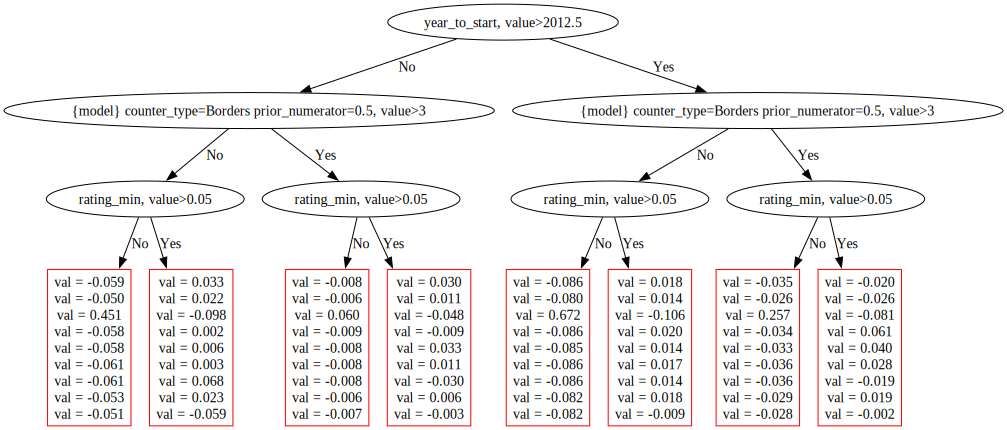

In [24]:
clf.plot_tree(
    tree_idx=4,
    pool=val_dataset
)

<div class="alert alert-warning">

### **`Partial plots` - the impact of features on prediction**
</div>

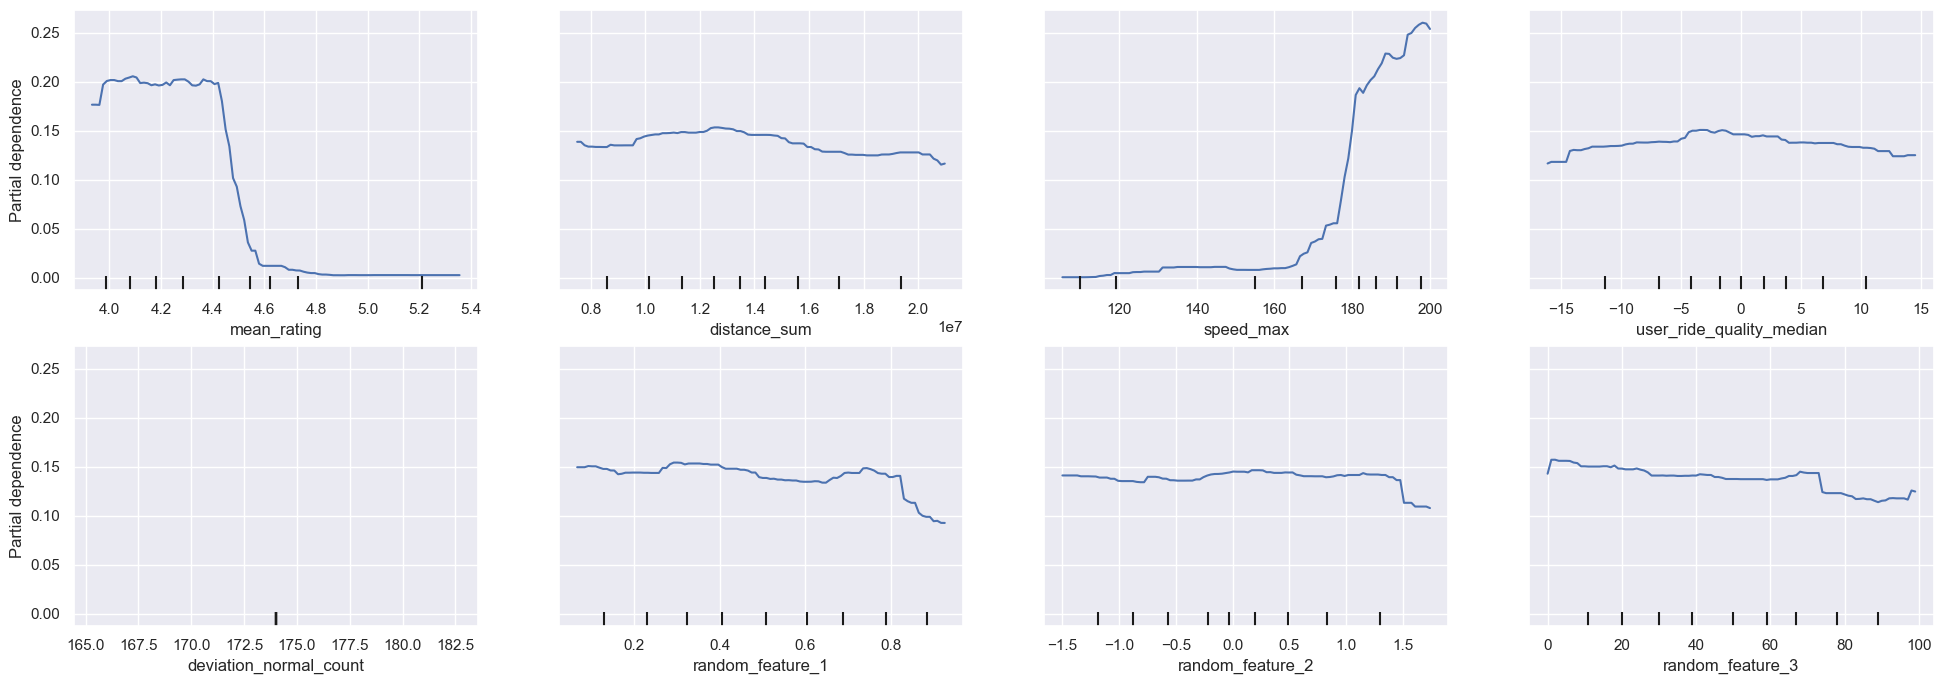

In [25]:
from sklearn.inspection import PartialDependenceDisplay

plt.rcParams['figure.figsize']=(24, 8)
features = X.drop(cat_cols, axis=1).columns

features = ['mean_rating', 'distance_sum', 'speed_max', 'user_ride_quality_median',
            'deviation_normal_count', 'random_feature_1', 'random_feature_2', 'random_feature_3']

PartialDependenceDisplay.from_estimator(clf, X_test,
                                        features = features,
                                        target='engine_overheat',
                                        n_cols=4,
                                        n_jobs=-1,
                                        random_state=42,)

<div class="alert alert-warning">

### **Regression**
</div>

In [26]:
y = df['target_reg']
X = df.drop(drop_cols + ['target_reg','target_class'], axis=1, errors = 'ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
regr = CatBoostRegressor(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                         )

regr.fit( X_train, y_train, 
        eval_set=(X_test, y_test),
        verbose=50, plot=False, early_stopping_rounds=200)

print(regr.get_best_score())

Learning rate set to 0.056174
0:	learn: 17.0988040	test: 17.8186403	best: 17.8186403 (0)	total: 1.55ms	remaining: 1.55s
50:	learn: 11.1767513	test: 12.3937978	best: 12.3937978 (50)	total: 53.7ms	remaining: 999ms
100:	learn: 10.4170221	test: 12.1773740	best: 12.1739695 (93)	total: 100ms	remaining: 891ms
150:	learn: 9.7621364	test: 12.0984723	best: 12.0941546 (146)	total: 146ms	remaining: 821ms
200:	learn: 9.1067253	test: 12.1530347	best: 12.0924277 (162)	total: 190ms	remaining: 755ms
250:	learn: 8.5765628	test: 12.1764882	best: 12.0924277 (162)	total: 235ms	remaining: 702ms
300:	learn: 8.1562264	test: 12.2085630	best: 12.0924277 (162)	total: 286ms	remaining: 663ms
350:	learn: 7.7224033	test: 12.2269390	best: 12.0924277 (162)	total: 333ms	remaining: 616ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.09242769
bestIteration = 162

Shrink model to first 163 iterations.
{'learn': {'RMSE': 7.609738123079426}, 'validation': {'RMSE': 12.092427694865451}}


<div class="alert alert-warning">

### **We look at the remains**

When we make a prediction for a classification task, in addition to the metric, we also visually evaluate the quality based on the confusion matrix. </br>
Here is what we can use to visually evaluate regression:
</div>

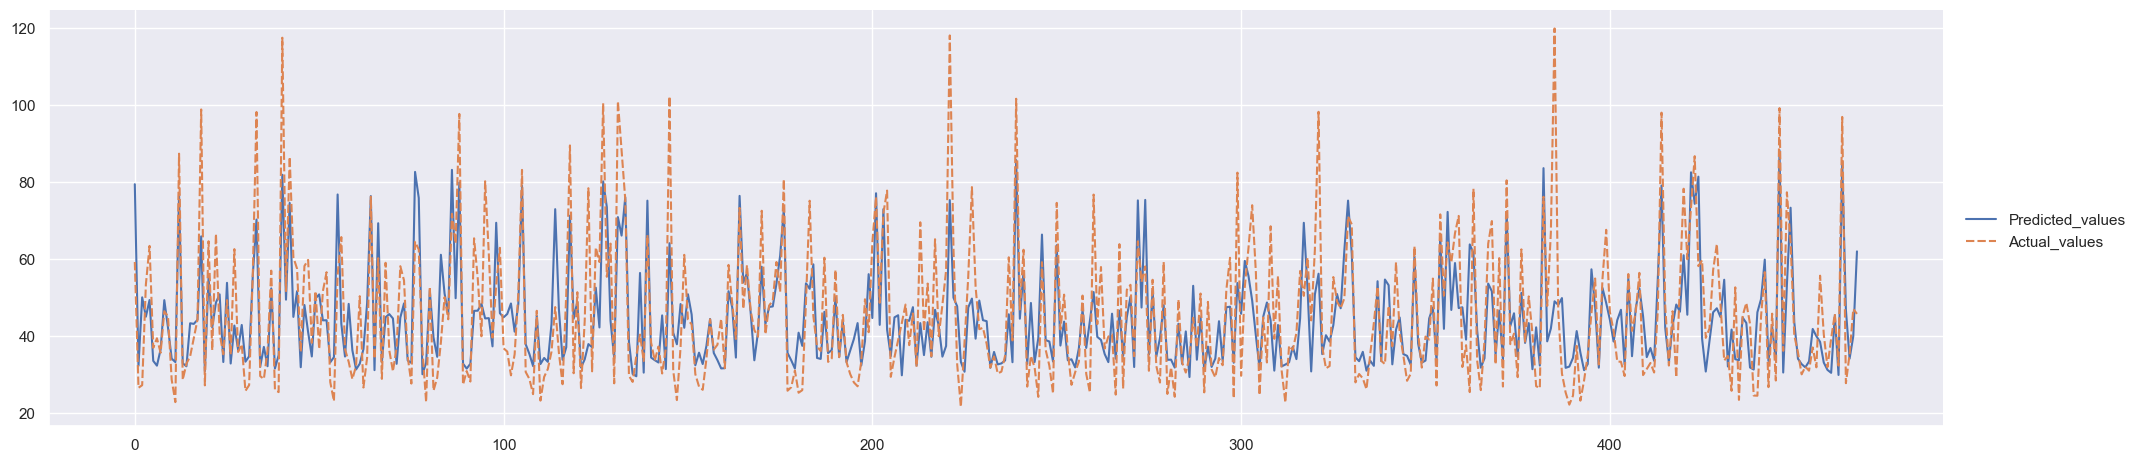

In [28]:
cbr_prediction = regr.predict(X_test)

df_pred = pd.DataFrame(cbr_prediction, columns = ["Predicted_values"])
df_pred["Actual_values"] =  y_test.values

g = sns.relplot(data = df_pred, aspect = 4, kind = 'line')
# g.set(yscale="log")#.set(xscale="log")

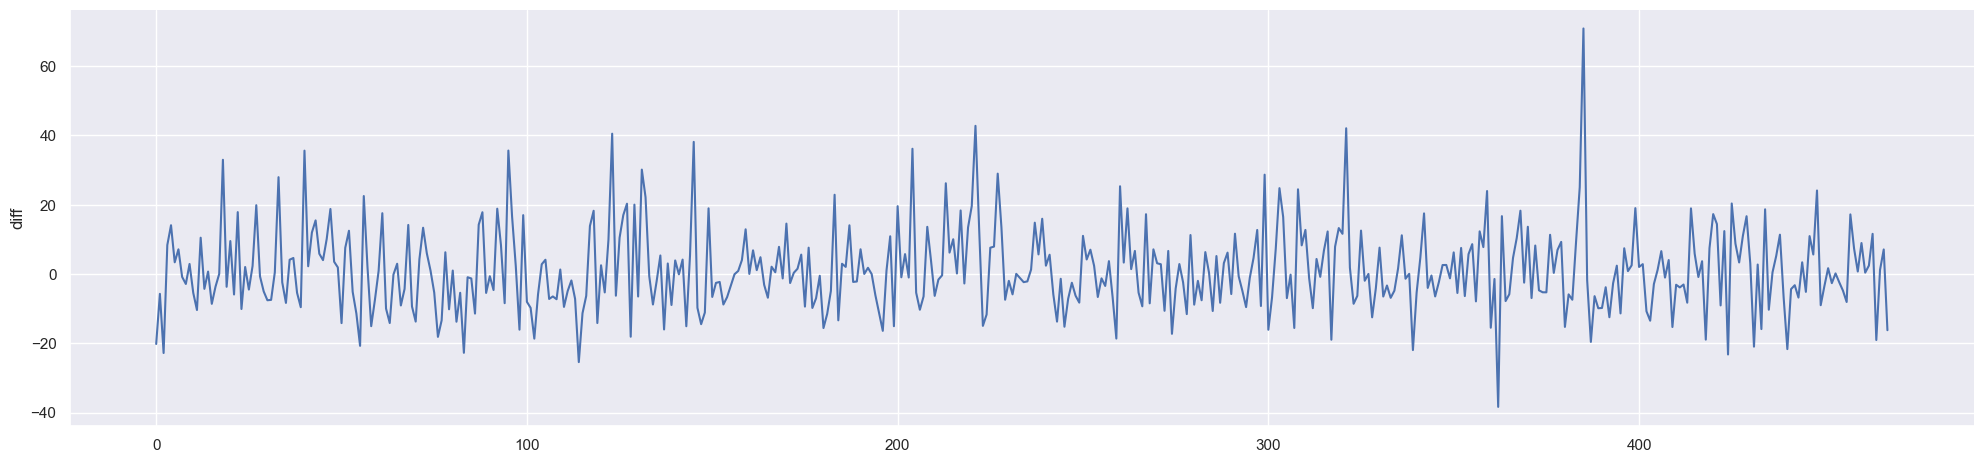

In [29]:
df_pred['diff'] = df_pred["Actual_values"] - df_pred["Predicted_values"]
sns.relplot(data = df_pred['diff'], aspect = 4, kind = 'line')
# sns.displot(data = df_pred['diff'], aspect = 2, bins=60)

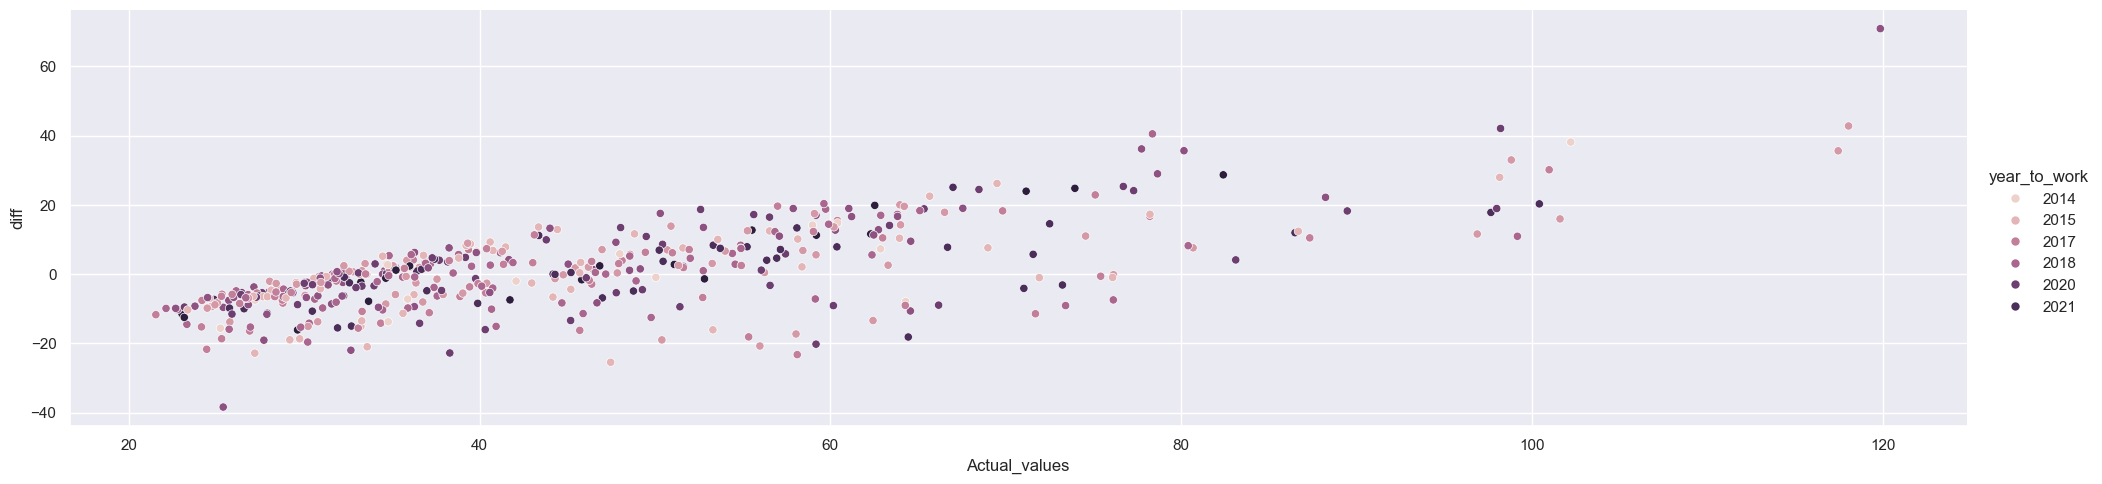

In [30]:
df_pred['year_to_work'] = X_test["year_to_work"].values

g = sns.relplot(data = df_pred,
                x = 'Actual_values',
                y = 'diff',
                hue = 'year_to_work',
                kind = 'scatter',
                aspect = 4,)

# # g.set(yscale="log")#.set(xscale="log")

In [33]:
df_pred['year_to_work'] = X_test["year_to_work"].values
# sns.displot(data = df_pred['diff'], aspect = 4, hue = 'year_to_work')